Task 2: Loan Prediction (Credit Risk)

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [4]:
# Load dataset (you need to update this path with your file path)
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
# Print columns and their data types
print("Columns and their data types:")
print(df.dtypes)

Columns and their data types:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [8]:
# --- Step 1: Data overview ---
print("Data info and missing values:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())


Data info and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Missing values per column:
Loan_ID               0
Gender               13
M

In [9]:
# --- Step 2: Handle missing values ---

# For categorical columns with missing values, fill with mode (most frequent value)
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# For numerical columns, fill missing with median (LoanAmount, Loan_Amount_Term, Credit_History)
num_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in num_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum())



Missing values after imputation:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<ipython-input-9-3ce79d7af1f2>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)
<ipython-input-9-3ce79d7af1f2>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

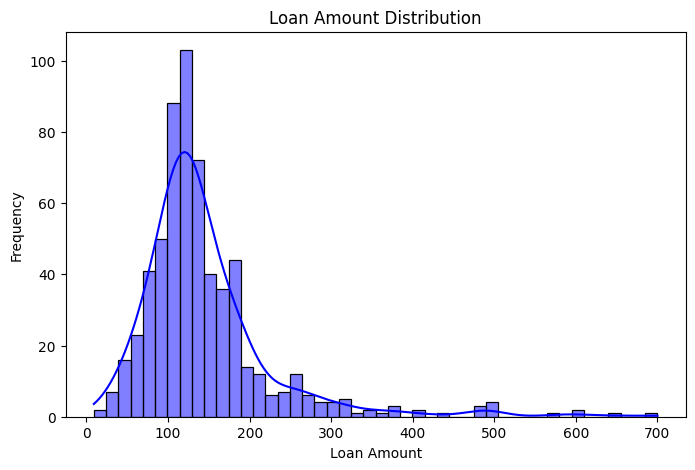

In [10]:
# --- Step 3: Exploratory Data Analysis (EDA) ---

# Visualize LoanAmount distribution
plt.figure(figsize=(8,5))
sns.histplot(df['LoanAmount'], kde=True, color='blue')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

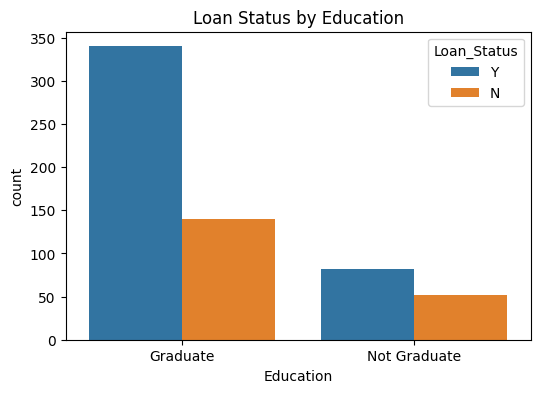

In [11]:
# Visualize Education counts with respect to Loan Status
plt.figure(figsize=(6,4))
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Loan Status by Education')
plt.show()

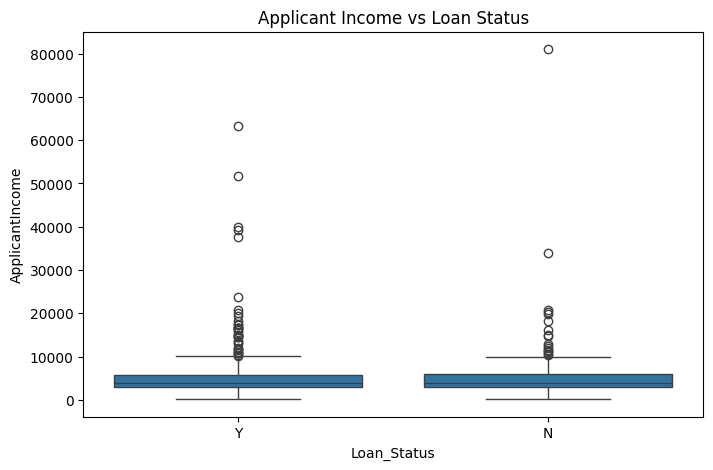

In [12]:
# Visualize ApplicantIncome distribution by Loan_Status
plt.figure(figsize=(8,5))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Applicant Income vs Loan Status')
plt.show()

In [13]:
# --- Step 4: Data preprocessing for modeling ---

# Convert target variable Loan_Status to binary (Y=1, N=0)
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

# Convert categorical variables to dummy/indicator variables
df_model = pd.get_dummies(df.drop(['Loan_ID'], axis=1), drop_first=True)

# Separate features and target
X = df_model.drop('Loan_Status', axis=1)
y = df_model['Loan_Status']

In [16]:
# --- Step 5: Split data into train and test sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 6: Train Logistic Regression model ---
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# --- Step 7: Predictions and evaluation ---
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")


Model Accuracy: 0.7886


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


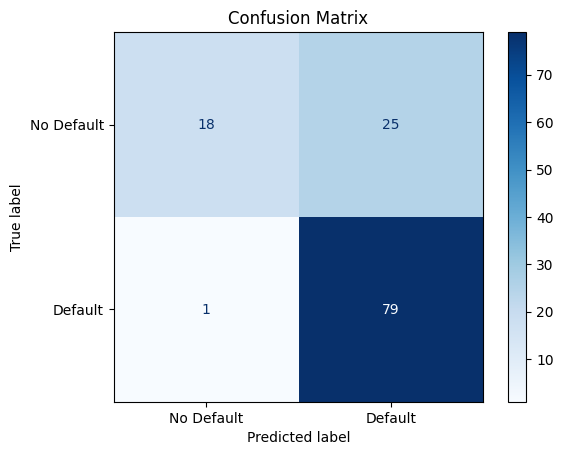

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default', 'Default'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
